In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [111]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np




In [321]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [267]:
print(df)

    Day   Millons of pounds in sales
0     1                          2.0
1     2                          8.0
2     3                         20.0
3     4                         13.0
4     5                          5.0
5     6                          9.0
6     7                         10.0
7     8                          8.0
8     9                         22.0
9    10                         10.0
10   11                          2.0
11   12                          4.0
12   13                          7.0
13   14                          9.0


C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


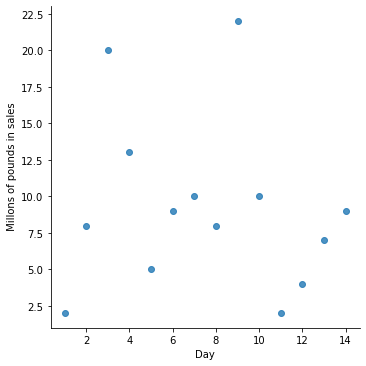

In [268]:
sns.lmplot(df.columns[0], df.columns[1], data = df, fit_reg=False)

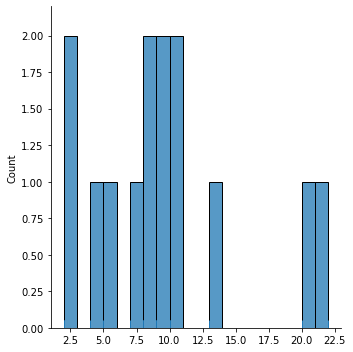

In [77]:
sns.displot(data, bins=20, kde=False, rug=True)

In [78]:
np.mean(data)

9.214285714285714

In [79]:
np.median(data)

8.5

In [95]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval



In [340]:
def bootstrap_mean(sample, sample_size, n_boots):
    """Generate bootstraps"""
    sample_size = len(sample)
    n_bootstraps = []
    for i in range(n_boots):
        bootstraps = np.random.choice(sample,len(sample))
        boot_mean = np.mean(bootstraps)
        n_bootstraps.append(boot_mean)
        CI_lower = np.percentile(np.array(n_bootstraps), 2.5)
        CI_upper = np.percentile(np.array(n_bootstraps), 97.5)
        data_mean = np.mean(sample)
    return data_mean, CI_lower, CI_upper
    

In [341]:
bootstrap_mean(data, data, 100)

(9.214285714285714, 5.5339285714285715, 11.86785714285714)

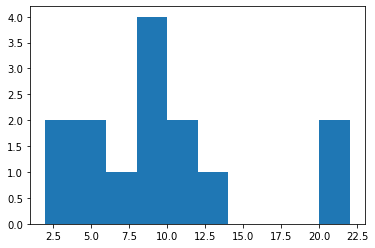

In [223]:
plt.hist(data)
plt.show()

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 20000.0)

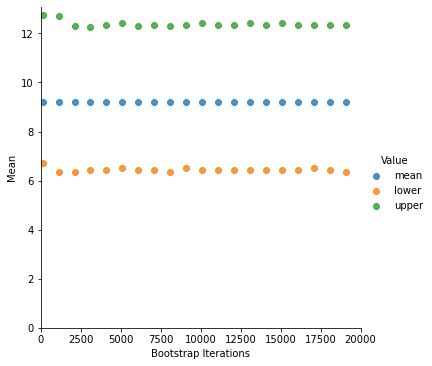

In [231]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 20000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 20000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [342]:
def bootstrap_mean_ci(sample, sample_size, n_boots, ci):
    "Bootstrap function with additonal CIs"
    ci_u = 100-((100-ci)/2)
    ci_l = (100-ci)/2
    sample_size = len(sample)
    n_bootstraps = []
    for i in range(n_boots):
        bootstraps = np.random.choice(sample,len(sample))
        boot_mean = np.mean(bootstraps)
        n_bootstraps.append(boot_mean)
        CI_lower = np.percentile(np.array(n_bootstraps), ci_l)
        CI_upper = np.percentile(np.array(n_bootstraps), ci_u)
        data_mean = np.mean(sample)
    return data_mean, CI_lower, CI_upper
    



In [358]:
bootstrap_mean_ci(data, data, 10000, 95)

(9.214285714285714, 6.428571428571429, 12.428571428571429)

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 20000.0)

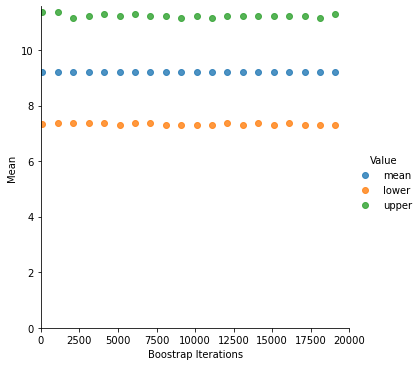

In [260]:
boots = []
for i in range(100, 20000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 20000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [269]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
df1 = pd.read_csv(r'https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
# Note: you can add more cells as needed to organise your code and your plots


In [270]:
df1.head(n=100)

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
95,16,NaN
96,16,NaN
97,18,NaN
98,16,NaN


In [271]:
df1.shape

(249, 2)

In [272]:
len(df1)

249

In [273]:
count_nan_current_fleet = count = df1["Current fleet"].isna().sum()
count_nan_current_fleet

0

In [275]:
count_nan_newfleet = count = df1["New Fleet"].isna().sum()
count_nan

170

In [276]:
df_index = np.array(df.index)
x = df_index


In [278]:
current_fleet = df1['Current fleet']

In [314]:
new_fleet = df1['New Fleet']
current_fleet = df1['Current fleet']


In [283]:
x.shape

(14,)

In [284]:
y.shape ###  I learnt a valuable lesson here, you cannot use arrays in sns.lmplot! Should be column names.

(249,)

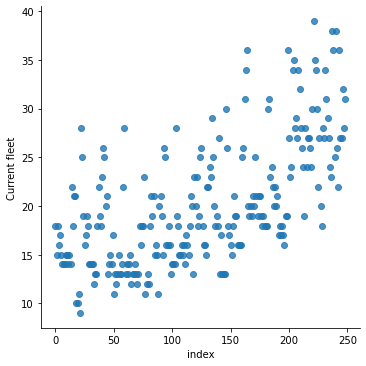

In [286]:
sns.lmplot(data = df1.reset_index(), x = 'index', y = 'Current fleet', fit_reg=False)

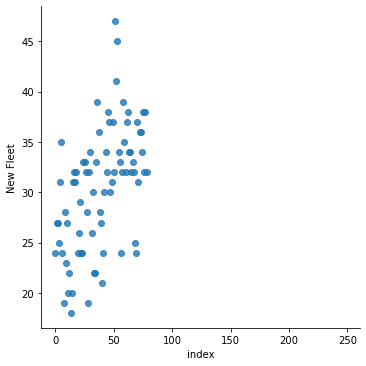

In [288]:
sns.lmplot(data = df1.reset_index(), x = 'index', y = 'New Fleet', fit_reg=False)

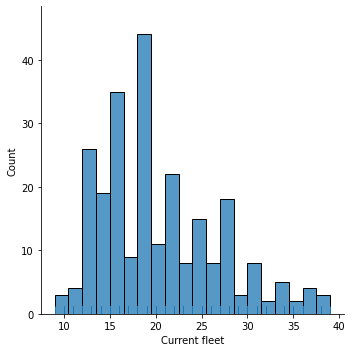

In [289]:
sns.displot(y, bins=20, kde=False, rug=True)

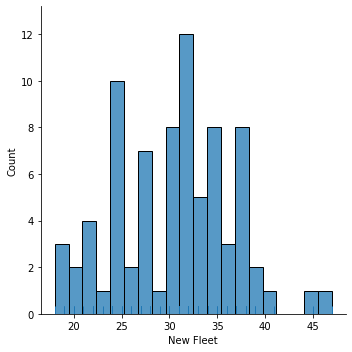

In [290]:
sns.displot(y1, bins=20, kde=False, rug=True)

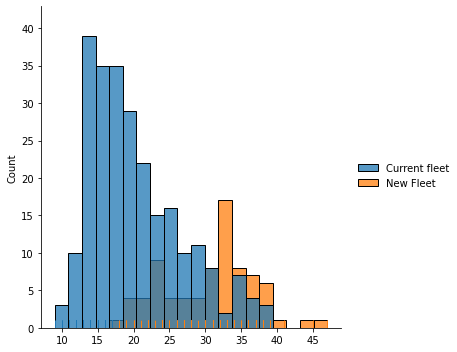

In [291]:
sns.displot(df1, bins=20, kde=False, rug=True)

In [298]:
df1_dropped_nans = df1.dropna(axis=0)
df1_dropped_nans

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
74,18,34.0
75,18,38.0
76,23,32.0
77,11,38.0


In [348]:
new_fleet_dropped_nans = df1_dropped_nans['New Fleet']

In [306]:
df1_mean_nans = df1.fillna(np.mean(df1['New Fleet']))
df1_mean_nans

,Current fleet,New Fleet
0,18,24.000000
1,15,27.000000
2,18,27.000000
3,16,25.000000
4,17,31.000000
...,...,...
244,27,30.481013
245,27,30.481013
246,32,30.481013
247,28,30.481013


In [307]:
df_new = df1_mean_nans
data = df_new[df_new.columns[1]].values
print(("Mean: %f" % np.mean(data))) 
print(("Median: %f" % np.median(data))) 
print(("Var: %f" % np.var(data)))
print(("std: %f" % np.std(data))) 

data1 = df_new[df_new.columns[0]].values
print(("Mean: %f" % np.mean(data1))) 
print(("Median: %f" % np.median(data1))) 
print(("Var: %f" % np.var(data1)))
print(("std: %f" % np.std(data1))) 

print(df_new.describe())
print(df.describe())

Mean: 30.481013
Median: 30.481013
Var: 11.685629
std: 3.418425
Mean: 20.144578
Median: 19.000000
Var: 40.983113
std: 6.401805
       Current fleet   New Fleet
count     249.000000  249.000000
mean       20.144578   30.481013
std         6.414699    3.425310
min         9.000000   18.000000
25%        15.000000   30.481013
50%        19.000000   30.481013
75%        24.000000   30.481013
max        39.000000   47.000000
           Day   Millons of pounds in sales
count  14.0000                    14.000000
mean    7.5000                     9.214286
std     4.1833                     5.898873
min     1.0000                     2.000000
25%     4.2500                     5.500000
50%     7.5000                     8.500000
75%    10.7500                    10.000000
max    14.0000                    22.000000


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [309]:
### mean current fleet

data_mean_current_fleet = np.mean(df1['Current fleet'])
data_mean_current_fleet


20.14457831325301

In [310]:
#mean new fleet

data_mean_new_fleet = np.mean(df1['New Fleet'])
data_mean_new_fleet

30.481012658227847

In [344]:
### call bootstrap function with 95% ci for current fleet

bootstrap_mean_ci(current_fleet, current_fleet, 1000, 95)

(20.14457831325301, 19.39748995983936, 20.996184738955822)

In [352]:
###call bootstrap function with 95% ci for new fleet with dropped nans

bootstrap_mean_ci(new_fleet_dropped_nans, new_fleet_dropped_nans, 10000, 60)

(30.481012658227847, 29.89873417721519, 31.050632911392405)

In [359]:
#### STD function 

def bootstrap_std_ci(sample, sample_size, n_boots, ci):
    "Bootstrap function with additonal CIs"
    ci_u = 100-((100-ci)/2)
    ci_l = (100-ci)/2
    sample_size = len(sample)
    n_bootstraps = []
    for i in range(n_boots):
        bootstraps = np.random.choice(sample,len(sample))
        boot_mean = np.std(bootstraps)
        n_bootstraps.append(boot_mean)
        CI_lower = np.percentile(np.array(n_bootstraps), ci_l)
        CI_upper = np.percentile(np.array(n_bootstraps), ci_u)
        data_mean = np.std(sample)
    return data_mean, CI_lower, CI_upper
    

In [361]:
bootstrap_std_ci(new_fleet_dropped_nans, new_fleet_dropped_nans, 10000, 95)

(6.068930545150859, 5.138980157535642, 6.914276418447937)

In [ ]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    sample1 = np.array(sample1)
    sample2 = np.array(sample2)
    concat = np.concatenate((sample1, sample2))
    
    return pvalue

In [372]:
current_fleet = np.array(current_fleet)  ##change both varaibles into arrays and join to make vector using concat ready to 
#be permutated 
new_fleet_dropped_nans = np.array(new_fleet_dropped_nans)
concat = np.concatenate((current_fleet, new_fleet_dropped_nans))

In [369]:
current_fleet.shape

(249, 1)

In [371]:
new_fleet_dropped_nans.shape

(79, 1)

In [373]:
concat.shape

(328, 1)

In [375]:
perm = np.random.permutation(concat) #permutate the concat object 

In [385]:
pold = perm[:int(len(perm)/2)]
pnew = perm[int(len(perm)/2):]

In [386]:
tperm = (np.mean(pnew))-(np.mean(pold)) #we take the new mean - old mean
tperm

0.0853658536585371

In [402]:
n_permutations = 100
perms = []
bigs = []
for i in range(n_permutations):
    perm = np.random.permutation(concat)
    perms.append(perm)
    
print(perms)
    

[array([[36.],
       [34.],
       [30.],
       [14.],
       [38.],
       [32.],
       [29.],
       [32.],
       [29.],
       [19.],
       [24.],
       [37.],
       [20.],
       [16.],
       [32.],
       [14.],
       [25.],
       [24.],
       [12.],
       [23.],
       [21.],
       [19.],
       [26.],
       [14.],
       [36.],
       [25.],
       [18.],
       [30.],
       [27.],
       [23.],
       [24.],
       [32.],
       [13.],
       [14.],
       [39.],
       [15.],
       [18.],
       [13.],
       [17.],
       [22.],
       [23.],
       [21.],
       [14.],
       [26.],
       [18.],
       [16.],
       [36.],
       [13.],
       [15.],
       [31.],
       [41.],
       [19.],
       [18.],
       [18.],
       [15.],
       [15.],
       [16.],
       [19.],
       [20.],
       [20.],
       [27.],
       [18.],
       [32.],
       [35.],
       [23.],
       [20.],
       [22.],
       [25.],
       [25.],
       [32.],
       [13.],
     

In [407]:
for i in perms:
        if i 
            i = 1
        else: i = 0
        
        

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()